In [1]:
import scipy as sp
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.stats import vonmises
import numpy as np
from tqdm import tqdm

In [2]:
kappa=0
n_steps=5000
step_length = 1.0
angles = vonmises.rvs(kappa, size=n_steps)
np.shape(angles)

(5000,)

In [3]:
def make_path(n_steps, step_length, kappa, plot=False, progress=True):
    # Generate random turning angles from a Von Mises distribution
    angles = vonmises.rvs(kappa, size=n_steps)

    # Initialize starting point and initial angle
    x, y = [0], [0]  # Starting at the origin
    current_angle = 0  # Initial angle (facing right)

    # Simulate the walk
    if progress:
        for i in tqdm(range(n_steps)):
            # Update the angle by adding the next random angle from von Mises distribution
            current_angle += angles[i]
    
            # Calculate new coordinates using cosine and sine of the current angle
            new_x = x[-1] + step_length * np.cos(current_angle)
            new_y = y[-1] + step_length * np.sin(current_angle)
    
            # Append the new coordinates
            x.append(new_x)
            y.append(new_y)
    else:
        for i in range(n_steps):
            # Update the angle by adding the next random angle from von Mises distribution
            current_angle += angles[i]
    
            # Calculate new coordinates using cosine and sine of the current angle
            new_x = x[-1] + step_length * np.cos(current_angle)
            new_y = y[-1] + step_length * np.sin(current_angle)
    
            # Append the new coordinates
            x.append(new_x)
            y.append(new_y)

    
        
    if plot:
        # Plot the 2D random walk
        plt.figure(figsize=(8, 8))
        plt.plot(x, y, marker='o', markersize=2, alpha=0.7, label='Walker path')
        plt.title('2D Random Walk with Turning Angles from a Von Mises Distribution')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.legend()
        plt.show()
        
    return x, y

100%|██████████| 5000/5000 [00:00<00:00, 481285.17it/s]


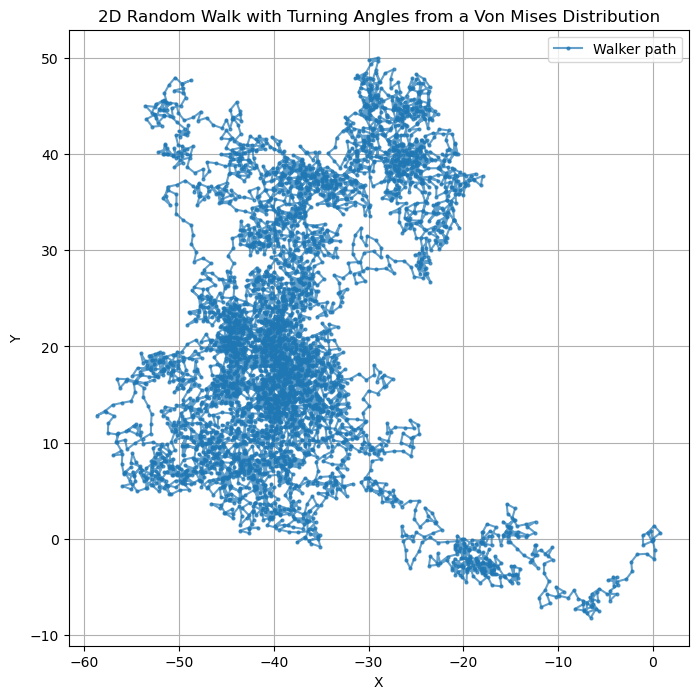

In [4]:
# Show an example path
make_path(n_steps, step_length, kappa, plot=True);

In [5]:
# Sample 10000 paths, get the linear displacement 
sample_size = 10000
displacements = []
for i in tqdm(range(sample_size)):
    x, y = make_path(n_steps, step_length, kappa, progress=False)
    displacements.append( euclidean([x[0], y[0]], [x[-1], y[-1]]) )



100%|██████████| 10000/10000 [01:34<00:00, 106.29it/s]


In [6]:
predicted_displacement = np.sqrt(n_steps) * step_length
print(n_steps, step_length, kappa)
print(f"Predicted linear displacement (analytical) for kappa={kappa}, {n_steps} and {step_length} steps: {predicted_displacement:.2f}")

5000 1.0 0
Predicted linear displacement (analytical) for kappa=0, 5000 and 1.0 steps: 70.71


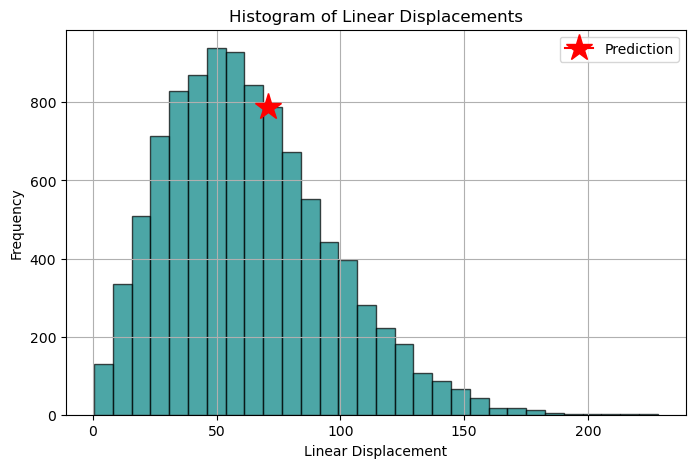

Observed Displacement Mean: 63.03


In [7]:
# Plot the histogram
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(displacements, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title('Histogram of Linear Displacements')
plt.xlabel('Linear Displacement')
plt.ylabel('Frequency')

# Find the index of the bin that contains the mean value
bin_index = np.digitize(predicted_displacement, bins) - 1  # Get the bin index for the prediction

# Set y coordinate as the height of the bar at the bin that contains the mean
pred_y = n[bin_index]

# Plot the predicted displacement
plt.plot(predicted_displacement, pred_y, marker='*', color='red', markersize=20, label='Prediction')
plt.grid(True)

# Add a legend to explain the star
plt.legend()
plt.show()



print(f"Observed Displacement Mean: {np.mean(displacements):.2f}")

In [8]:
# Read paths from csv
import pandas as pd

# Load the CSV file
file_path = '/users/mfricke/simreef/kappa0.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Get number of columns
num_columns = df.shape[1]
num_walkers = num_columns // 2  # Assuming 2 columns per walker (x, y)

# Store the displacement for each walker
displacements = {}

for i in tqdm(range(num_walkers)):
    x_col = 2 * i  # Even index for x-coordinate
    y_col = 2 * i + 1  # Odd index for y-coordinate
    
    # Extract the x and y coordinates for the current walker
    x_coords = df.iloc[:, x_col]
    y_coords = df.iloc[:, y_col]
    
    # Compute displacement as the Euclidean distance between the first and last points
    initial_position = (x_coords.iloc[0], y_coords.iloc[0])
    final_position = (x_coords.iloc[-1], y_coords.iloc[-1])
    
    displacement = np.sqrt((final_position[0] - initial_position[0])**2 + 
                           (final_position[1] - initial_position[1])**2)
    
    walker_name = f'walker_{i+1}'
    displacements[walker_name] = displacement

csv_displacements = []
# Display the displacements for each walker
for walker, displacement in displacements.items():
    csv_displacements.append(displacement)

100%|██████████| 10000/10000 [00:00<00:00, 13581.50it/s]


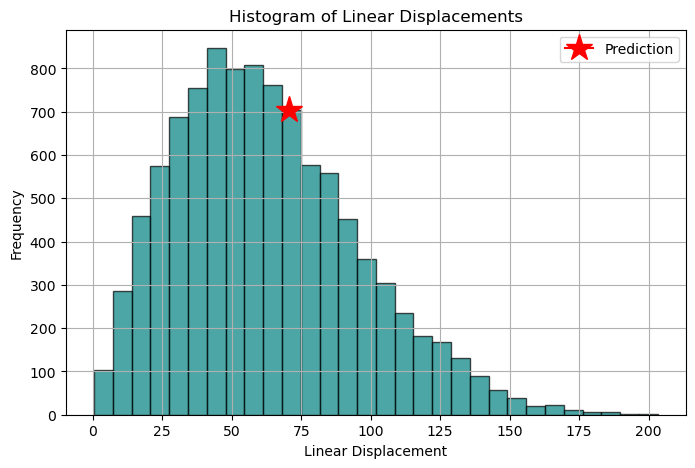

Observed Displacement Mean: 62.54


In [9]:
# Plot the histogram
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(csv_displacements, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title('Histogram of Linear Displacements')
plt.xlabel('Linear Displacement')
plt.ylabel('Frequency')

# Find the index of the bin that contains the mean value
bin_index = np.digitize(predicted_displacement, bins) - 1  # Get the bin index for the prediction

# Set y coordinate as the height of the bar at the bin that contains the mean
pred_y = n[bin_index]

# Plot the predicted displacement
plt.plot(predicted_displacement, pred_y, marker='*', color='red', markersize=20, label='Prediction')
plt.grid(True)

# Add a legend to explain the star
plt.legend()
plt.show()



print(f"Observed Displacement Mean: {np.mean(csv_displacements):.2f}")

In [10]:
len(csv_displacements)

10000

In [11]:
# Kappa = 4

kappa=4

# Sample 10000 paths, get the linear displacement 
sample_size = 10000
displacements = []
for i in tqdm(range(sample_size)):
    x, y = make_path(n_steps, step_length, kappa, progress=False)
    displacements.append( euclidean([x[0], y[0]], [x[-1], y[-1]]) )

100%|██████████| 10000/10000 [01:38<00:00, 101.22it/s]


Observed Displacement Mean: 230.72


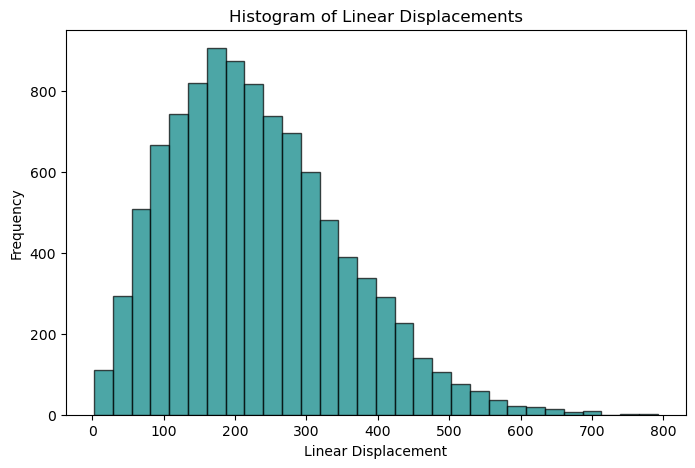

In [12]:
# Plot the histogram
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(displacements, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title('Histogram of Linear Displacements')
plt.xlabel('Linear Displacement')
plt.ylabel('Frequency')

print(f"Observed Displacement Mean: {np.mean(displacements):.2f}")

100%|██████████| 10000/10000 [00:00<00:00, 13747.53it/s]


Observed Displacement Mean: 231.44


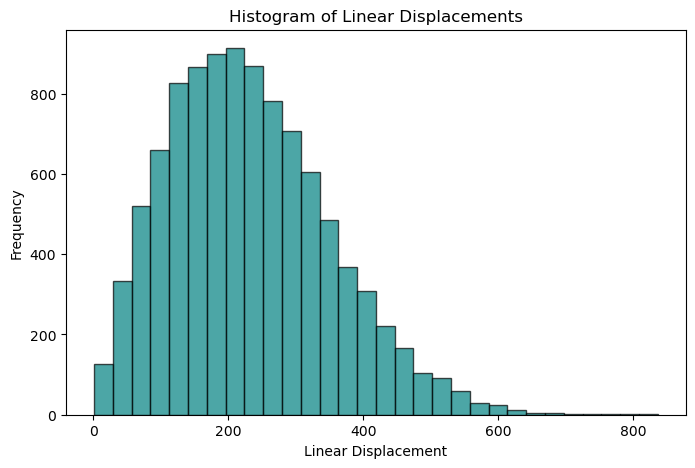

In [15]:
# Read out from C program and plot histogram
# Read paths from csv
import pandas as pd

# Load the CSV file
file_path = '/users/mfricke/simreef/kappa4.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Get number of columns
num_columns = df.shape[1]
num_walkers = num_columns // 2  # Assuming 2 columns per walker (x, y)

# Store the displacement for each walker
displacements = {}

for i in tqdm(range(num_walkers)):
    x_col = 2 * i  # Even index for x-coordinate
    y_col = 2 * i + 1  # Odd index for y-coordinate
    
    # Extract the x and y coordinates for the current walker
    x_coords = df.iloc[:, x_col]
    y_coords = df.iloc[:, y_col]
    
    # Compute displacement as the Euclidean distance between the first and last points
    initial_position = (x_coords.iloc[0], y_coords.iloc[0])
    final_position = (x_coords.iloc[-1], y_coords.iloc[-1])
    
    displacement = np.sqrt((final_position[0] - initial_position[0])**2 + 
                           (final_position[1] - initial_position[1])**2)
    
    walker_name = f'walker_{i+1}'
    displacements[walker_name] = displacement

csv_displacements = []
# Display the displacements for each walker
for walker, displacement in displacements.items():
    csv_displacements.append(displacement)
    
# Plot the histogram
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(csv_displacements, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title('Histogram of Linear Displacements')
plt.xlabel('Linear Displacement')
plt.ylabel('Frequency')

print(f"Observed Displacement Mean: {np.mean(csv_displacements):.2f}")